                            Open   High    Low  Close   Volume  Dividends  \
Date                                                                        
2024-01-18 00:00:00-05:00  14.20  14.77  14.05  14.29  3906000        0.0   
2024-01-19 00:00:00-05:00  14.36  14.60  14.09  14.51  2391500        0.0   
2024-01-22 00:00:00-05:00  14.50  15.16  14.30  14.90  3606500        0.0   
2024-01-23 00:00:00-05:00  15.00  15.02  14.05  14.18  3495300        0.0   
2024-01-24 00:00:00-05:00  14.28  14.38  13.82  13.95  2513800        0.0   

                           Stock Splits  
Date                                     
2024-01-18 00:00:00-05:00           0.0  
2024-01-19 00:00:00-05:00           0.0  
2024-01-22 00:00:00-05:00           0.0  
2024-01-23 00:00:00-05:00           0.0  
2024-01-24 00:00:00-05:00           0.0  


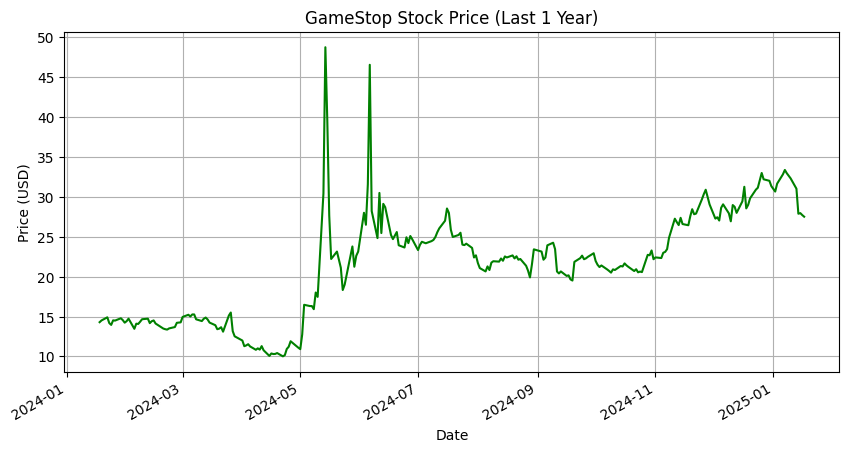

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Fetch GameStop stock data using yfinance
gamestop = yf.Ticker("GME")

# Get the historical stock data
stock_data = gamestop.history(period="1y")  # Last year of data

# Display the first few rows of the stock data
print(stock_data.head())

# Plot GameStop stock price (Close price)
plt.figure(figsize=(10, 5))
stock_data['Close'].plot(title="GameStop Stock Price (Last 1 Year)", color='green')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


2024-10-31     860300000.0
2024-07-31     798300000.0
2024-04-30             NaN
2024-01-31    1793600000.0
2023-10-31    1078300000.0
2023-07-31    1163800000.0
2023-04-30             NaN
Name: Total Revenue, dtype: object


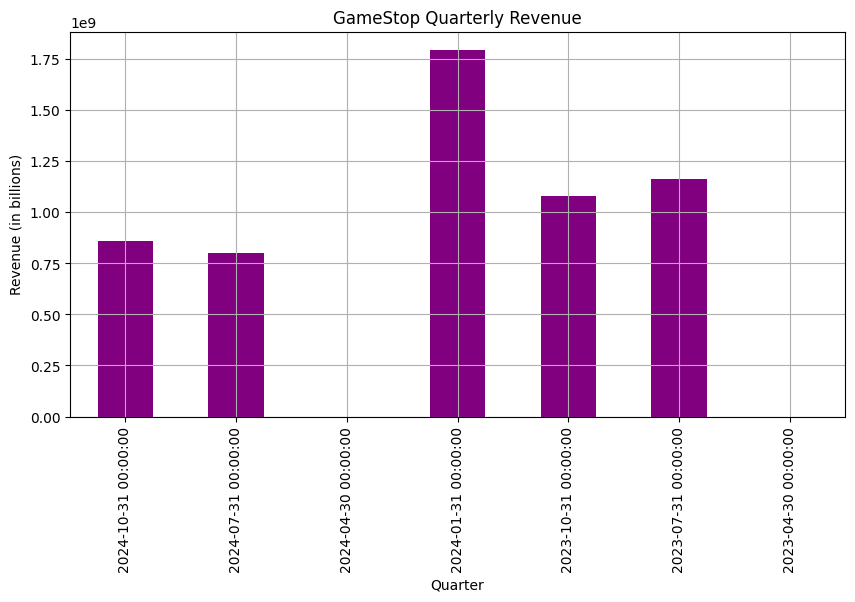

In [2]:
# Step 2: Fetch quarterly financials for GameStop using yfinance
financials = gamestop.quarterly_financials

# Extract the 'Total Revenue' row
revenue_data = financials.loc['Total Revenue']

# Display the revenue data
print(revenue_data)

# Plot the revenue data
plt.figure(figsize=(10, 5))
revenue_data.plot(kind='bar', title="GameStop Quarterly Revenue", color='purple')
plt.xlabel('Quarter')
plt.ylabel('Revenue (in billions)')
plt.grid(True)
plt.show()


          Close            Revenue
Year                              
2024  21.025892  1150733333.333333


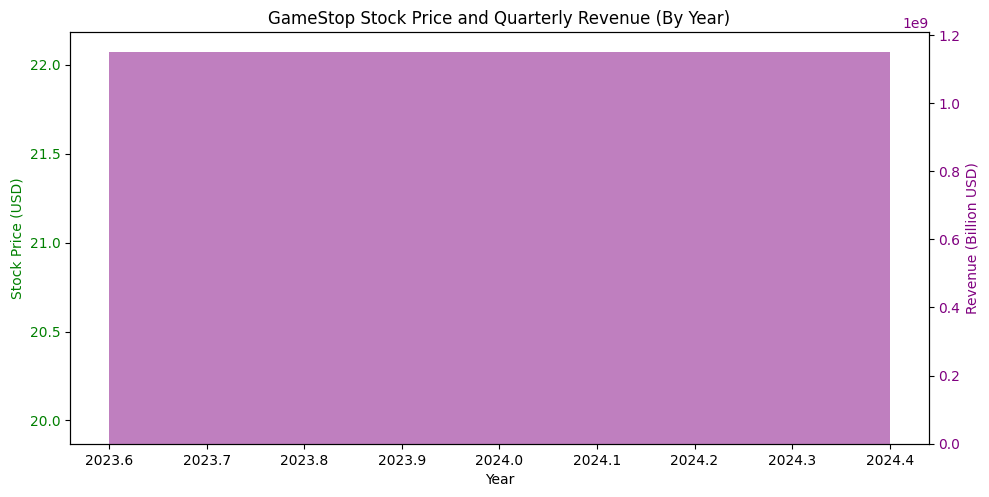

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data):
    # Convert revenue data to a DataFrame
    revenue_df = revenue_data.reset_index()
    revenue_df.columns = ['Date', 'Revenue']
    revenue_df['Date'] = pd.to_datetime(revenue_df['Date'])

    # Prepare stock data (assuming it's already in 'stock_data')
    stock_data['Year'] = stock_data.index.year

    # Prepare revenue data (group by year)
    revenue_df['Year'] = revenue_df['Date'].dt.year

    # Merge stock and revenue data
    merged_data = pd.merge(
        stock_data.groupby('Year').mean()['Close'], 
        revenue_df.groupby('Year').mean()['Revenue'], 
        left_index=True, right_on='Year'
    )

    # Display merged data
    print(merged_data)

    # Plot both stock price and revenue on the same chart
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Plot stock price (on the left y-axis)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Stock Price (USD)', color='green')
    ax1.plot(merged_data.index, merged_data['Close'], color='green', label="Stock Price")
    ax1.tick_params(axis='y', labelcolor='green')

    # Create a second y-axis to plot the revenue (on the right y-axis)
    ax2 = ax1.twinx()
    ax2.set_ylabel('Revenue (Billion USD)', color='purple')
    ax2.bar(merged_data.index, merged_data['Revenue'], color='purple', alpha=0.5, label="Revenue")
    ax2.tick_params(axis='y', labelcolor='purple')

    # Layout and title
    fig.tight_layout()
    plt.title("GameStop Stock Price and Quarterly Revenue (By Year)")

    # Show the plot
    plt.show()

# Example usage of the make_graph function:
# Assuming stock_data and revenue_data are already prepared
# stock_data = your_stock_data_here
# revenue_data = your_revenue_data_here

# Call the function to generate the graph
make_graph(stock_data, revenue_data)


In [ ]:
import yfinance as yf
import pandas as pd

ticker_symbol = "TSLA"

tesla = yf.Ticker(ticker_symbol)

stock_data = tesla.history(period="5y")

print("Tesla Stock Data (5-Year Historical):")
print(stock_data.head())

stock_data.to_csv(f"{ticker_symbol}_stock_data.csv")


In [ ]:
import yfinance as yf

# Fetch Tesla financial data
tesla = yf.Ticker("TSLA")

# Extract quarterly financial data
financials = tesla.quarterly_financials

# Extract the revenue row
revenue_data = financials.loc["Total Revenue"]
print(revenue_data)


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Fetch Tesla stock data using yfinance
tesla = yf.Ticker("TSLA")

# Get the historical stock data
stock_data = tesla.history(period="1y")  # Last year of data

# Display the first few rows of the stock data
print(stock_data.head())

# Plot Tesla stock price (Close price)
plt.figure(figsize=(10, 5))
stock_data['Close'].plot(title="Tesla Stock Price (Last 1 Year)", color='blue')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()
